In [1]:
import numpy as np
from scipy.linalg import norm
from ase.build import molecule
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase.units import fs
from fireballpy import Fireball

# Define our atoms
atoms = molecule('CH4')

# Assign Fireball calculator
atoms.calc = Fireball(fdata='biology')

# Set momenta so that T = 300K initially
MaxwellBoltzmannDistribution(atoms, temperature_K=300)

# Define the integrator
dyn = VelocityVerlet(atoms, trajectory='dinamic.traj', logfile='dinamic.log', timestep=0.2*fs)

In [2]:
# Variables of our simulation
nsteps = 1000
nsave = 100
savefreq = nsteps // nsave

# Allocate arrays to save
time = np.arange(1, nsteps + 1, savefreq)*0.2*fs
epot = np.zeros(nsave)
ekin = np.zeros(nsave)
forc = np.zeros(nsave)

# Run the simulation
for i in range(nsave):
    dyn.run(savefreq)
    epot[i] = atoms.get_potential_energy()
    ekin[i] = atoms.get_kinetic_energy()
    forc[i] = norm(atoms.get_forces(), axis=1).mean()

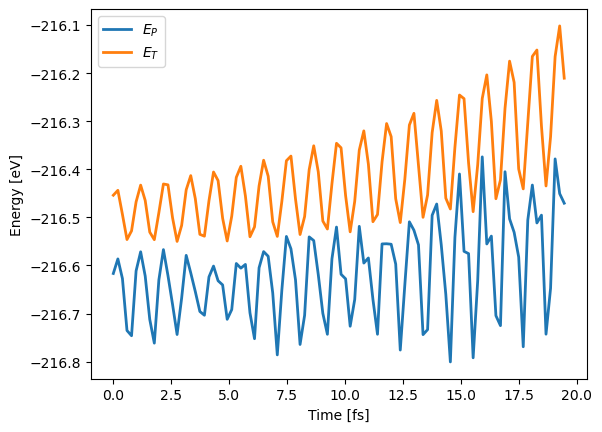

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(time, epot, lw=2, label='$E_P$')
# ax.plot(time, ekin, lw=2, label='$E_K$')
ax.plot(time, epot + ekin, lw=2, label='$E_T$')
ax.set_xlabel('Time [fs]')
ax.set_ylabel('Energy [eV]')
ax.legend()

Text(0, 0.5, '$\\langle |F| \\rangle$ [eV/$\\AA$]')

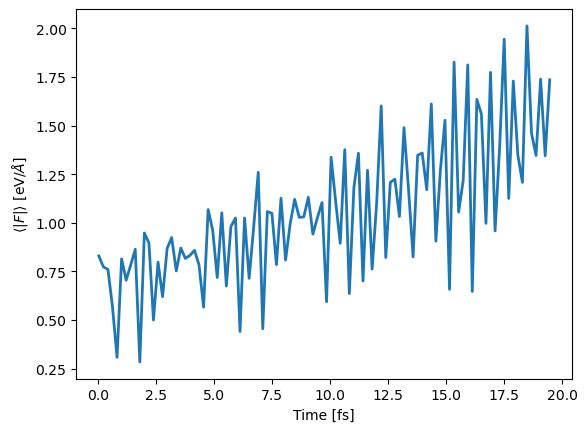

In [4]:
fig, ax = plt.subplots()
ax.plot(time, forc, lw=2)
ax.set_xlabel('Time [fs]')
ax.set_ylabel(r'$\langle |F| \rangle$ [eV/$\AA$]')

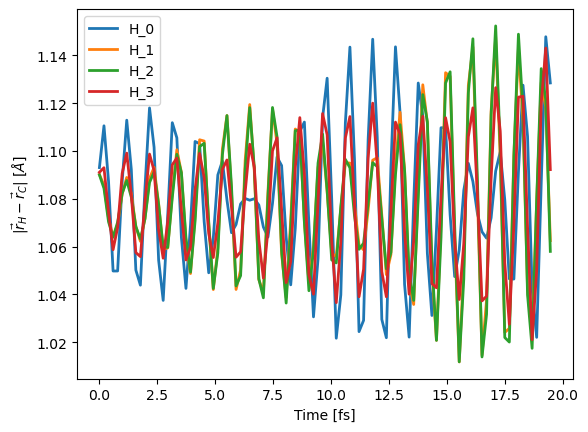

In [5]:
# Load the trajectory
from ase.io.trajectory import Trajectory
traj = Trajectory('dinamic.traj')

# Compute distance from H to C
distances = np.zeros((nsave, 4))
for i, frame in enumerate(traj[1::savefreq]):
    positions = frame.get_positions()
    distances[i, :] = norm((positions[1:, :] - positions[0, :]), axis=1)

# Plot it
fig, ax = plt.subplots()
for i in range(distances.shape[1]):
    ax.plot(time, distances[:, i], lw=2, label=f"H_{i}")
ax.set_xlabel('Time [fs]')
ax.set_ylabel(r'$|\vec{r}_H - \vec{r}_C|$ [$\AA$]')
ax.legend()

In [6]:
traj[0].get_forces(), traj[0].get_positions()

(array([[ 3.18825781e-14,  3.49361822e-14, -4.16910533e-07],
        [-1.56317853e+00, -1.56317853e+00, -1.56317854e+00],
        [ 1.56317853e+00,  1.56317853e+00, -1.56317854e+00],
        [-1.56317875e+00,  1.56317875e+00,  1.56317875e+00],
        [ 1.56317875e+00, -1.56317875e+00,  1.56317875e+00]]),
 array([[ 0.      ,  0.      ,  0.      ],
        [ 0.629118,  0.629118,  0.629118],
        [-0.629118, -0.629118,  0.629118],
        [ 0.629118, -0.629118, -0.629118],
        [-0.629118,  0.629118, -0.629118]]))

In [7]:
traj[1].get_forces(), traj[1].get_positions()

(array([[ 0.03064229,  0.12353503,  0.05098049],
        [-0.30862703, -0.39041033, -0.3290938 ],
        [ 0.26749393,  0.30721343, -0.28625553],
        [-0.26682871,  0.3108482 ,  0.27990344],
        [ 0.27731952, -0.35118634,  0.2844654 ]]),
 array([[-1.74090951e-03, -3.55460081e-04, -8.76404249e-04],
        [ 6.26433254e-01,  6.36972895e-01,  6.26775583e-01],
        [-6.27792652e-01, -6.30513119e-01,  6.31061361e-01],
        [ 6.25986171e-01, -6.31491258e-01, -6.29990870e-01],
        [-6.31187331e-01,  6.32339349e-01, -6.28546425e-01]]))

In [8]:
from ase.visualize import view
view(traj[0], viewer='x3d')

In [9]:
view(traj[-1], viewer='x3d')